In [1]:
import numpy as np
import matplotlib.pyplot as plt
import classes as cl
import masslosstime as ml
import masslosstime_env as ml_env
import cpml_masslosstime 
import planetstructure
from numpy import savetxt

We will use Kepler-36 as our example system. 

Start by inputting the necessary stellar and planetary parameters. We use parameters from Berger et al. (2020)

In [2]:
starparams=(1.17,4490, 1.59, 6126) #mass (solar masses), age (Gyr), radius (solar radii), effective temperature (K)
#parameters for the rocky planet Kepler-36b
planetRockyparams=(1.43,13.87) #radius (Earth radii), period (days)
#parameters for the enveloped planet Kepler-36c
planetEnvparams=(3.50,16.22)  #radius (Earth radii), period (days)

Uncertainties can be included on each input parameter

In [3]:
star_mass_err=.079
star_age_err=1667
star_rad_err=.069
star_teff_err=169

rocky_rad_err=.089
rocky_per_err=.0005

env_rad_err=.0001
env_per_err=.155

Create the planetary system using the dictionaries and variables defined above

In [4]:
#uncertainties are input as key-word arguments

system=cl.PlanetarySystem(starparams, planetRockyparams, planetEnvparams, Mstar_err=star_mass_err, Star_age_err=star_age_err, Rstar_err=star_rad_err, Teff_err=star_teff_err, Rrocky_err=rocky_rad_err, Procky_err=rocky_per_err, Renv_err=env_rad_err, Penv_err=env_per_err)

Other optional key-word arguments for defining the planetary system include: 

albedo_rocky-set the albedo of the rocky planet, default=0

albedo_env- set the albedo of the enveloped planet, default=0

Xiron_rocky- set the iron mass fraction of the rocky planet, default=1/3

Xiron_env - set the iron mass fraction of the enveloped planet, default=1/3

Tkh_PE- the time at which we scale the timescales to compare between planets undergoing PE, value is set by default depending on stellar mass

Tkh_CPML- the time at which we scale the timescales for CPML, default= 1000 Myr

Tkh_PRV- the time at which we scale the tiemscales for PRV, default=1 Myr

In [5]:
#randomly sample N times
cl.PlanetarySystem.sample_params(system, N=500)

Choose one of the three mechanisms to evaluate first and save the returned minimum mass estimates. Repeat for all three mechanisms. 


In [7]:
#photoevaporation
cl.PlanetarySystem.calc_min_mass_env(system, PE=True, CPML=False, PRV=False)
Kepler36c_PE=system.planetEnv.minMcore_samps

 16%|█████████████                                                                    | 81/500 [03:45<18:27,  2.64s/it]

Cannot find maximum mass for enveloped planet with radius 3.4998620744887234


 64%|███████████████████████████████████████████████████▎                            | 321/500 [10:31<04:32,  1.52s/it]

Cannot find maximum mass for enveloped planet with radius 3.4999143616662134


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [12:02<02:09,  1.15s/it]

Cannot find maximum mass for enveloped planet with radius 3.500003544978992


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [14:22<00:00,  1.72s/it]


In [6]:
#core-powered mass loss
cl.PlanetarySystem.calc_min_mass_env(system, PE=False, CPML=True, PRV=False)
Kepler36c_CPML=system.planetEnv.minMcore_samps

 16%|█████████████▎                                                                   | 82/500 [06:28<29:20,  4.21s/it]

Cannot find maximum mass for enveloped planet with radius 3.4998620744887234


 64%|███████████████████████████████████████████████████▌                            | 322/500 [25:08<12:31,  4.22s/it]

Cannot find maximum mass for enveloped planet with radius 3.4999143616662134


 78%|██████████████████████████████████████████████████████████████                  | 388/500 [30:14<07:50,  4.21s/it]

Cannot find maximum mass for enveloped planet with radius 3.500003544978992


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [39:00<00:00,  4.68s/it]


In [9]:
#primordial radius valley model
cl.PlanetarySystem.calc_min_mass_env(system, PE=False, CPML=False, PRV=True)
Kepler36c_PRV=system.planetEnv.minMcore_samps

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:11<00:00, 41.67it/s]


Let's plot the probability distribution function for the enveloped planet minimum mass returned by each mechanism. We'll compare this to the measured mass of the planet from Vissapragada et al. (2020).

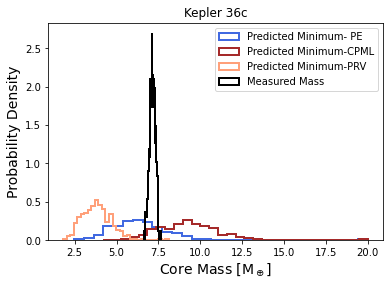

In [11]:
plt.hist(Kepler36c_PE,bins=30,density=True,histtype='step', linewidth=2, color='royalblue',label='Predicted Minimum- PE')

plt.hist(Kepler36c_CPML,bins=30,density=True,histtype='step',linewidth=2, color='brown',label='Predicted Minimum-CPML')

plt.hist(Kepler36c_PRV,bins=30,density=True,histtype='step',linewidth=2, color='lightsalmon',label='Predicted Minimum-PRV')

expected_mass=np.random.normal(7.13, 0.18, 500)
plt.hist(expected_mass,  bins=30, density=True, histtype='step',linewidth=2, color='k',label='Measured Mass')

plt.ylabel('Probability Density',fontsize=14)
plt.xlabel(r'Core Mass [M$_\oplus$]',fontsize=14)
plt.title('Kepler 36c')
plt.legend()

Here we see that the measured mass is greater than most of the minimum masses returned by photoevaporation or the primordial radius valley model. However, the minimum masses returned by core-powered mass loss, are clearly greater than the measured mass. From this probability distribution, we conclude that it is unlikely that Kepler-36 is consistent with core-powered mass loss. 